In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('breast-cancer.csv')
print(df.info())
print(df.head())
print(df['diagnosis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
from sklearn.preprocessing import StandardScaler

# Drop the 'id' column
df = df.drop('id', axis=1)

# Convert diagnosis to numeric: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features shape:", X_scaled.shape)
print("Target shape:", y.shape)
print("First 5 rows of standardized features:\n", X_scaled[:5])

Features shape: (569, 30)
Target shape: (569,)
First 5 rows of standardized features:
 [[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4

In [20]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (455, 30)
Test set shape: (114, 30)


In [21]:
from sklearn.svm import SVC

# Initialize SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# Train the model
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

<Figure size 600x600 with 0 Axes>

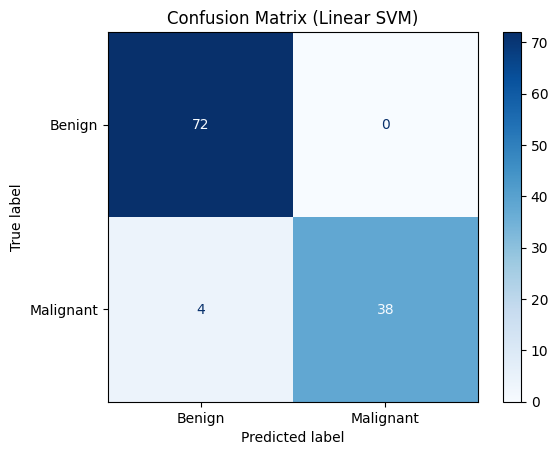

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred_linear = svm_linear.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)

# Plot confusion matrix as an image
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Linear SVM)')
plt.savefig('confusion_matrix_linear_svm.png')
plt.show()

In [23]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred_linear, target_names=['Benign', 'Malignant'])
print("Classification Report (Linear SVM):\n", report)

Classification Report (Linear SVM):
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [24]:
from sklearn.svm import SVC

# Initialize SVM with RBF kernel (default)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the model
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

<Figure size 600x600 with 0 Axes>

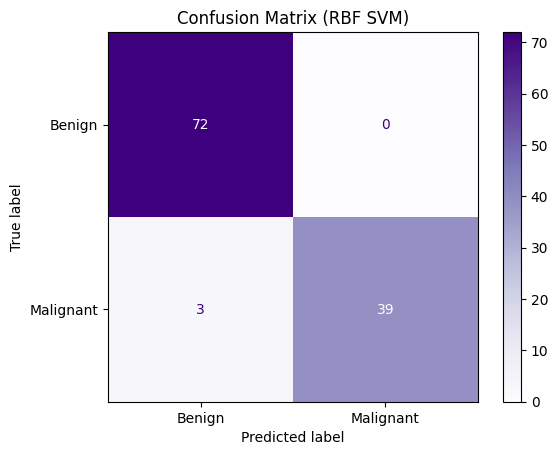

Classification Report (RBF SVM):
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predict
y_pred_rbf = svm_rbf.predict(X_test)

# Confusion matrix as image
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Purples')
plt.title('Confusion Matrix (RBF SVM)')
plt.savefig('confusion_matrix_rbf_svm.png')
plt.show()

# Classification report as text
report_rbf = classification_report(y_test, y_pred_rbf, target_names=['Benign', 'Malignant'])
print("Classification Report (RBF SVM):\n", report_rbf)

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

# Use only the first two features for visualization
X_vis = X_scaled[:, :2]

# Split into train and test sets (same as before, for consistency)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
from sklearn.svm import SVC

# Train SVM with RBF kernel on the 2-feature data
svm_rbf_vis = SVC(kernel='rbf', random_state=42)
svm_rbf_vis.fit(X_train_vis, y_train_vis)

SVC(random_state=42)

In [28]:
# Create a mesh grid over the feature space
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh grid
Z = svm_rbf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

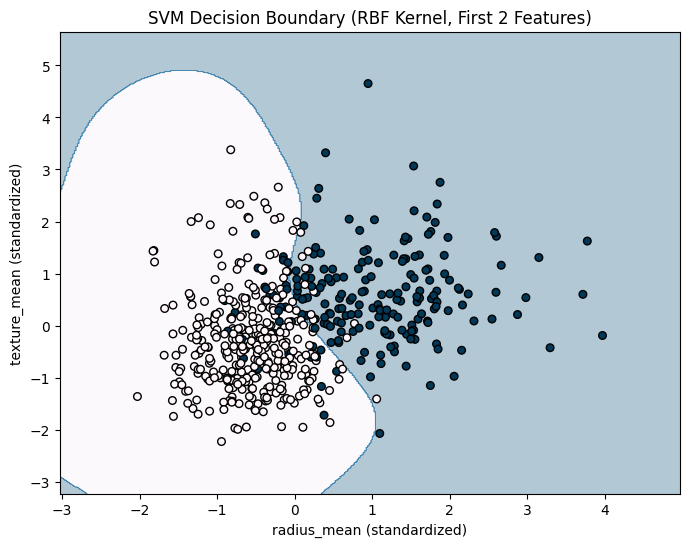

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.PuBu)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=plt.cm.PuBu, s=30)
plt.xlabel('radius_mean (standardized)')
plt.ylabel('texture_mean (standardized)')
plt.title('SVM Decision Boundary (RBF Kernel, First 2 Features)')
plt.savefig('svm_decision_boundary_rbf.png')
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid: try several values for C and gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [31]:
# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'C': 100, 'gamma': 0.01}
Best cross-validation accuracy: 0.9758241758241759


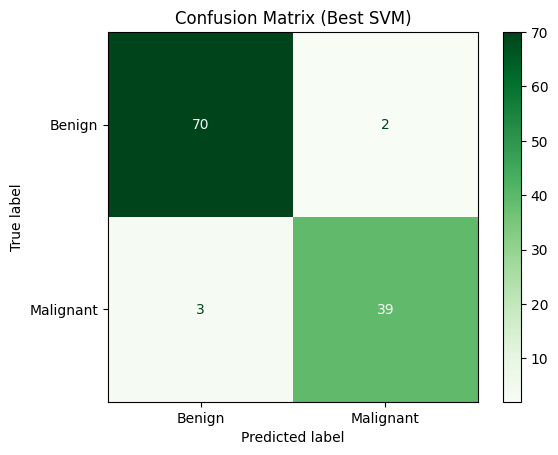

Classification Report (Best SVM):
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        72
   Malignant       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [32]:
# Use the best estimator to predict on the test set
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix (Best SVM)')
plt.savefig('confusion_matrix_best_svm.png')
plt.show()

# Classification report
print("Classification Report (Best SVM):\n", classification_report(y_test, y_pred_best, target_names=['Benign', 'Malignant']))